In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Read csv file
df_fraud = pd.read_csv('Fraud_check.csv')
df_fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


**EDA (Exploratory Data Analysis)**

In [3]:
# Rename columns with dot character
df_fraud.rename(columns={'Marital.Status': 'Marital_Status', 'Taxable.Income' : 'Taxable_Income',
                         'City.Population':'City_Population', 'Work.Experience':'Work_Experience'}, inplace=True)

df_fraud.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df_fraud.shape

(600, 6)

In [5]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Taxable_Income   600 non-null    int64 
 3   City_Population  600 non-null    int64 
 4   Work_Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
# Create a new column 'Taxable_Income_Type' to categorize the rows with Taxable_Income <= 30,000 as 'Risky' and >30,000 as 'Good'
df_fraud['Taxable_Income_Type'] = ''


In [7]:
df_fraud.loc[df_fraud['Taxable_Income'] <= 30000, 'Taxable_Income_Type'] = 'Risky'
df_fraud.loc[df_fraud['Taxable_Income'] > 30000, 'Taxable_Income_Type'] = 'Good'
df_fraud.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Taxable_Income_Type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [8]:
df_fraud['Taxable_Income_Type'].value_counts()

Good     476
Risky    124
Name: Taxable_Income_Type, dtype: int64

In [9]:
# Change string columns to categorical columns
columns =  ['Undergrad', 'Marital_Status', 'Urban', 'Taxable_Income_Type']

for x in columns:
  df_fraud[x] = df_fraud[x].astype('category')

df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Undergrad            600 non-null    category
 1   Marital_Status       600 non-null    category
 2   Taxable_Income       600 non-null    int64   
 3   City_Population      600 non-null    int64   
 4   Work_Experience      600 non-null    int64   
 5   Urban                600 non-null    category
 6   Taxable_Income_Type  600 non-null    category
dtypes: category(4), int64(3)
memory usage: 17.0 KB


In [10]:
# Change string values into categorical values

columns =  ['Undergrad', 'Marital_Status', 'Urban', 'Taxable_Income_Type']

for x in columns:
  df_fraud[x] = df_fraud[x].cat.codes

df_fraud.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Taxable_Income_Type
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


**Draw plot to check distribution of output data for visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


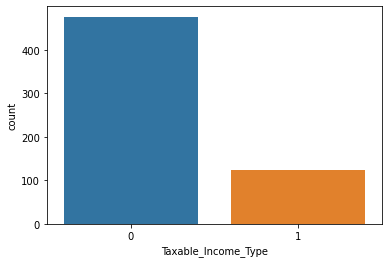

In [11]:
sns.countplot(df_fraud['Taxable_Income_Type'])

Observation: Number of risky customers are less compared to good customers. Even though this may look slightly imbalanced, this is valid in real time scenarios most of the times. Let us create a balanced dataset to create good model.

**Data Splitting**

In [12]:
x = df_fraud.drop(['Taxable_Income', 'Taxable_Income_Type'], axis='columns')

In [13]:
x.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [14]:
y = df_fraud['Taxable_Income_Type']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=123)

In [16]:
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (402, 5)
x_test shape:  (198, 5)
y_train shape:  (402,)
y_test shape:  (198,)


In [17]:
y_train.value_counts()

0    316
1     86
Name: Taxable_Income_Type, dtype: int64

**Decision Tree Classifier using Entropy Criteria**

In [18]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

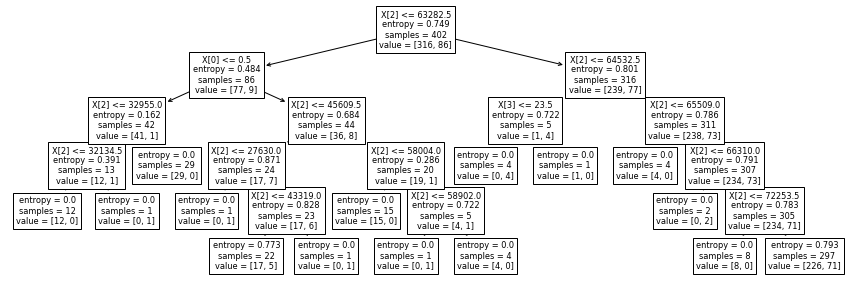

In [19]:
plt.figure(figsize=(15,5))
tree.plot_tree(model)
plt.show()

In [20]:
# Predictions
preds = model.predict(x_test)

In [21]:
confusion_matrix(y_test, preds)

array([[157,   3],
       [ 38,   0]])

In [22]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88       160
           1       0.00      0.00      0.00        38

    accuracy                           0.79       198
   macro avg       0.40      0.49      0.44       198
weighted avg       0.65      0.79      0.71       198



Observation: Accuracy of Decision Tree Classifier model is 40% which is less. Looks like this is due to imbalanced dataset. Let us create a balanced dataset, create model again and compare the results. 

In [23]:
# Create Balanced Dataset for x_train and y_train
from imblearn.over_sampling import SMOTE

# Transform the dataset
oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(x_train, y_train)

print('X_train shape: ', X_train.shape)
print('Y_train shape : ', Y_train.shape)


X_train shape:  (632, 5)
Y_train shape :  (632,)


In [24]:
Y_train.value_counts()

0    316
1    316
Name: Taxable_Income_Type, dtype: int64

**Decision Tree Classifier using Entropy Criteria (With Balanced Dataset)**

In [25]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

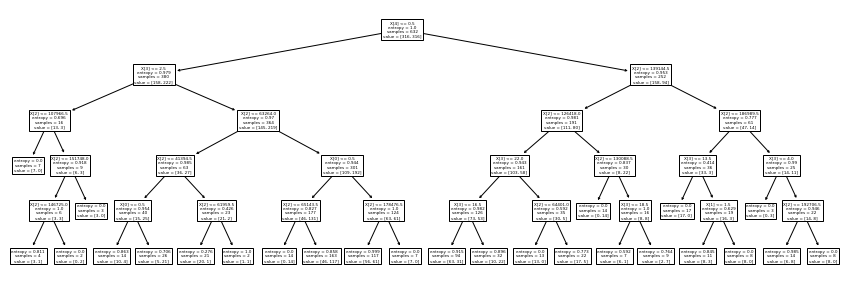

In [26]:
plt.figure(figsize=(15,5))
tree.plot_tree(model)
plt.show()

In [27]:
# Predictions
preds = model.predict(x_test)

In [28]:
confusion_matrix(y_test, preds)

array([[90, 70],
       [25, 13]])

In [29]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.78      0.56      0.65       160
           1       0.16      0.34      0.21        38

    accuracy                           0.52       198
   macro avg       0.47      0.45      0.43       198
weighted avg       0.66      0.52      0.57       198



Observation: Balanced dataset improved accuracy level to 51%

**Decision Tree Classificator Using gini criteria**

In [30]:
model = DecisionTreeClassifier(criterion='gini', max_depth=5)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

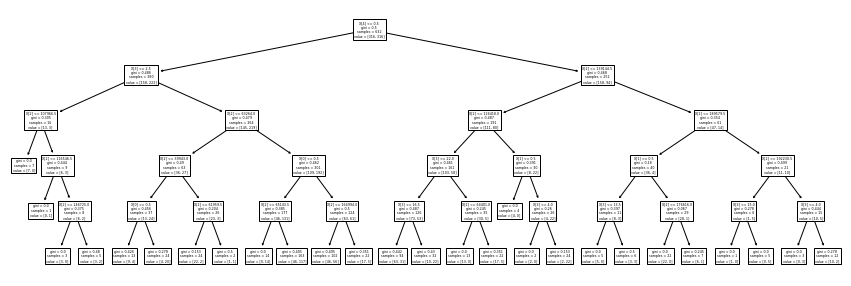

In [31]:
plt.figure(figsize=(15,5))
tree.plot_tree(model)
plt.show()

In [32]:
# Predictions
preds = model.predict(x_test)

In [33]:
confusion_matrix(y_test, preds)

array([[93, 67],
       [26, 12]])

In [34]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.78      0.58      0.67       160
           1       0.15      0.32      0.21        38

    accuracy                           0.53       198
   macro avg       0.47      0.45      0.44       198
weighted avg       0.66      0.53      0.58       198



Observation: Gini criteria slightly decreased accuracy of the model.

**Decision Tree Regressor**

In [35]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [36]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [37]:
# Prediction
preds = model.predict(x_test)

In [38]:
confusion_matrix(y_test, preds)

array([[108,  52],
       [ 26,  12]])

In [39]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.68      0.73       160
           1       0.19      0.32      0.24        38

    accuracy                           0.61       198
   macro avg       0.50      0.50      0.48       198
weighted avg       0.69      0.61      0.64       198



Observation: Decision Regressor is giving 45% accuracy.

Conclusion: After comparing all above created models, can conclude that Decision Tree Classifier with entropy criteria gives best accuracy and best suitable model for this data.